In [1]:
!pip install pyspark

In [2]:
from pyspark.sql import SparkSession

In [3]:
from pyspark.ml.feature import *

In [4]:
from pyspark.ml.clustering import KMeans

In [5]:
spark=SparkSession.builder.appName("SpSession").getOrCreate()

In [6]:
spark

In [7]:
data=spark.read.csv('customer_data.csv',header=True,inferSchema=True)

In [8]:
data.show()

+----------+---+-------------+--------------+
|CustomerID|Age|Annual_Income|Spending_Score|
+----------+---+-------------+--------------+
|         1| 19|        15000|            39|
|         2| 21|        18000|            81|
|         3| 20|        19000|             6|
|         4| 23|        22000|            77|
|         5| 31|        25000|            40|
|         6| 22|        17000|            76|
|         7| 35|        20000|            94|
|         8| 40|        27000|             3|
|         9| 23|        29000|            72|
|        10| 28|        30000|            14|
+----------+---+-------------+--------------+



In [9]:
data.printSchema()

root
 |-- CustomerID: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Annual_Income: integer (nullable = true)
 |-- Spending_Score: integer (nullable = true)



In [10]:
data=data.dropna()

In [11]:
data.show()

+----------+---+-------------+--------------+
|CustomerID|Age|Annual_Income|Spending_Score|
+----------+---+-------------+--------------+
|         1| 19|        15000|            39|
|         2| 21|        18000|            81|
|         3| 20|        19000|             6|
|         4| 23|        22000|            77|
|         5| 31|        25000|            40|
|         6| 22|        17000|            76|
|         7| 35|        20000|            94|
|         8| 40|        27000|             3|
|         9| 23|        29000|            72|
|        10| 28|        30000|            14|
+----------+---+-------------+--------------+



In [12]:
features=['Annual_Income','Spending_Score']

In [13]:
assembler=VectorAssembler(inputCols=features,outputCol='features_raw')

In [14]:
final_data = assembler.transform(data)

In [15]:
scaler = StandardScaler(inputCol='features_raw', outputCol='features', withStd=True, withMean=True)

In [17]:
scaled_data = scaler.fit(final_data).transform(final_data)

In [18]:
kmeans = KMeans(k=4, seed=1, featuresCol='features', predictionCol='cluster')

In [19]:
model = kmeans.fit(scaled_data)

In [20]:
cost = model.summary.trainingCost
print('Within Set Sum of Squared Errors:', cost)

Within Set Sum of Squared Errors: 2.54551641138782


In [21]:
predictions = model.transform(scaled_data)

In [22]:
predictions.select('CustomerID','Age','Annual_Income','Spending_Score').show()

+----------+---+-------------+--------------+
|CustomerID|Age|Annual_Income|Spending_Score|
+----------+---+-------------+--------------+
|         1| 19|        15000|            39|
|         2| 21|        18000|            81|
|         3| 20|        19000|             6|
|         4| 23|        22000|            77|
|         5| 31|        25000|            40|
|         6| 22|        17000|            76|
|         7| 35|        20000|            94|
|         8| 40|        27000|             3|
|         9| 23|        29000|            72|
|        10| 28|        30000|            14|
+----------+---+-------------+--------------+



In [23]:
pandas_df = predictions.select('Age','Annual_Income','Spending_Score', 'cluster').toPandas()

In [24]:
pandas_df

,Age,Annual_Income,Spending_Score,cluster
0,19,15000,39,1
1,21,18000,81,2
2,20,19000,6,1
3,23,22000,77,2
4,31,25000,40,3
5,22,17000,76,2
6,35,20000,94,2
7,40,27000,3,3
8,23,29000,72,0
9,28,30000,14,3


In [25]:
pandas_df.to_csv("customers_clustered.csv", index=False)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

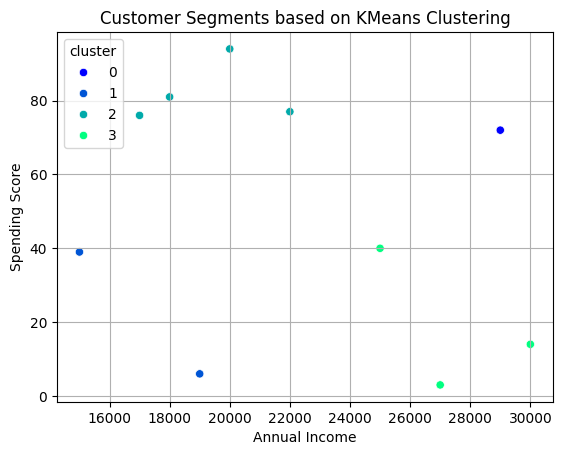

In [28]:
sns.scatterplot(data=pandas_df, x='Annual_Income', y='Spending_Score', hue='cluster', palette='winter')
plt.title("Customer Segments based on KMeans Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.grid(True)
plt.show()